# Paket Prabayar Manakah yang Lebih Baik?

Anda bekerja sebagai seorang analis di perusahaan operator telekomunikasi bernama Megaline. Perusahaan tersebut menawarkan kliennya dua jenis paket prabayar, yaitu paket Surf dan paket Ultimate. Departemen periklanan ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan, sehingga mereka bisa membuat anggaran iklan yang sesuai.

Anda akan melakukan analisis awal untuk paket-paket prabayar tersebut berdasarkan sampel klien yang berukuran relatif kecil. Anda memiliki 500 data klien Megaline, yang berisi informasi seperti: siapa mereka, dari mana asalnya, jenis paket apa yang mereka gunakan, serta jumlah panggilan dan pesan yang mereka kirim di tahun 2018. Tugas Anda adalah untuk menganalisis perilaku para pengguna, lalu menentukan paket prabayar manakah yang lebih menguntungkan.

## Pendahuluan
Pada saat melakukan analisis, kita perlu merumuskan beberapa hipotesis yang perlu kita uji lebih terlebih dahulu. Tidak semua hipotesis yang kita kerjakan bisa langsung digunakan, kita harus bisa memilih hipotesis mana yang paling tepat untuk menyelesaikan masalah-masalah yang ada pada data yang kita miliki. Untuk membuat keputusan yang tepat, kita harus memahami apakah asumsi yang kita buat sudah tepat atau belum.

## Tujuan:
Tujuan dari case / project ini adalah untuk menganalisis perilaku klien dan menentukan paket prabayar mana yang mendatangkan lebih banyak pendapatan. 
Hal ini dilakukan dengan melakukan analisis data klien Megaline yang tersedia yang berisi informasi seperti: siapa mereka, dari mana asalnya, jenis paket apa yang mereka gunakan, serta jumlah panggilan dan pesan yang mereka kirim di tahun 2018.

## Langkah Pengerjaan:
    1. Buka file data dan pelajari informasi umumnya
    2. Siapkan datanya
    3. Analisis datanya
    4. Uji hipotesisnya
    5. Tulis kesimpulannya secara menyeluruh

# Inisialisasi

In [1]:
# Import Library Data Processing
import pandas as pd
import numpy as np

# Import Library Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library Statistics
import scipy.stats as st


## Memuat Data

### Buka file data 

File path:

/datasets/megaline_calls.csv

/datasets/megaline_internet.csv

/datasets/megaline_messages.csv

/datasets/megaline_plans.csv 

/datasets/megaline_users.csv

In [2]:
# Muat file data ke dalam DataFrame yang berbeda
data_calls = pd.read_csv('/datasets/megaline_calls.csv')
data_internet = pd.read_csv('/datasets/megaline_internet.csv')
data_messages = pd.read_csv('/datasets/megaline_messages.csv')
data_plans = pd.read_csv('/datasets/megaline_plans.csv')
data_users = pd.read_csv('/datasets/megaline_users.csv')


### Pelajari Informasi Umumnya

[Deskripsikan apa yang Anda lihat dan perhatikan dalam informasi umum dan sampel data yang ditampilkan. Apakah terdapat masalah (seperti: tipe data yang tidak sesuai, data yang hilang, dll.) yang mungkin memerlukan penyelidikan dan perubahan lebih lanjut? Bagaimana memperbaiki masalah tersebut?]

#### Pengguna / User

- **Pelajari info dari data_users**

In [3]:
# Tampilkan informasi/rangkuman umum tentang DataFrame pengguna
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
# Tampilkan sampel data pengguna
data_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


#### Memperkaya Kualitas Data

In [5]:
data_users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [6]:
data_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


#### Panggilan

- **Pelajari info dari data_calls**

In [7]:
# Tampilkan informasi/rangkuman umum tentang DataFrame panggilan
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [8]:
# Tampilkan sampel data berisi panggilan
data_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


#### Memperkaya Kualitas Data

In [9]:
data_calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [10]:
data_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


#### Internet

- **Pelajari info dari data_internet** 

In [11]:
# Tampilkan informasi/rangkuman umum tentang DataFrame internet
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [12]:
# Tampilkan sampel data untuk traffic internet
data_internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


#### Memperkaya Kualitas Data

In [13]:
data_internet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [14]:
data_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


#### Pesan/SMS

- **Pelajari info dari data_messages**  

In [15]:
# Tampilkan informasi/rangkuman umum tentang DataFrame SMS
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Tampilkan sampel data untuk SMS
data_messages

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [17]:
data_messages.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

#### Memperkaya Kualitas Data

In [18]:
data_messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


#### Paket Prabayar

- **Pelajari info dari data_plans**  

In [19]:
# Tampilkan informasi/rangkuman umum tentang DataFrame paket-paket prabayar
data_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [20]:
# Tampilkan sampel data untuk paket-paket tersebut
data_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate



#### Memperkaya Kualitas Data

In [21]:
data_plans.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [22]:
data_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [23]:
# Cek Duplikasi Data
print('users duplicate', data_users.duplicated().sum())
print('calls duplicate', data_calls.duplicated().sum())
print('internet duplicate', data_internet.duplicated().sum())
print('messages duplicate', data_messages.duplicated().sum())
print('plans duplicate', data_plans.duplicated().sum())

users duplicate 0
calls duplicate 0
internet duplicate 0
messages duplicate 0
plans duplicate 0


**Kesimpulan :**
- data_users : terdapat 466 data null pada kolom churn_date (hal ini menunjukkan bahwa sebagian besar pengguna masih menggunakan layanan pada saat data ini dibuat), tipe data reg_date dan churn_date belum sesuai, tidak terdapat duplikasi data.
- data_calls : tidak ada data yang hilang, tipe data call_date belum sesuai, tidak terdapat duplikasi data.
- data_internet : tidak ada data yang hilang, tipe data session_date belum sesuai, tidak terdapat duplikasi data.
- data_messages : tidak ada data yang hilang, tipe data message_date belum sesuai, tidak terdapat duplikasi data.
- data_plans : tidak ada data yang hilang dan  tipe data sudah sesuai, tidak terdapat duplikasi data.


## Mempersiapkan Data

### Mengkonversikan data menjadi tipe data yang dibutuhkan

#### Memperbaiki Tipe Data pada data_users

In [24]:
data_users.dtypes

user_id        int64
first_name    object
last_name     object
age            int64
city          object
reg_date      object
plan          object
churn_date    object
dtype: object

In [25]:
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'])


In [26]:
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'])


In [27]:
# Checking 
data_users.dtypes

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object

#### Memperbaiki Tipe Data pada data_calls

In [28]:
data_calls.dtypes

id            object
user_id        int64
call_date     object
duration     float64
dtype: object

In [29]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'])

In [30]:
# Checking
data_calls.dtypes

id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object

#### Memperbaiki Tipe Data pada data_internet

In [31]:
data_internet.dtypes

id               object
user_id           int64
session_date     object
mb_used         float64
dtype: object

In [32]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'])

In [33]:
# Checking
data_internet.dtypes

id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object

#### Memperbaiki Tipe Data pada data_messages

In [34]:
data_messages.dtypes

id              object
user_id          int64
message_date    object
dtype: object

In [35]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'])

In [36]:
# Checking
data_messages.dtypes

id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object

## Mengagregasi Data per Pengguna

[Sekarang, karena data yang kita miliki telah bersih, agregasikan data setiap pengguna per periode agar kita hanya memiliki satu catatan per pengguna per periode. Hal ini akan memudahkan analisis lebih lanjut.]

[Satukan data agregat tersebut ke dalam satu DataFrame sehingga satu catatan di dalamnya akan menunjukkan tingkat konsumsi seorang pengguna unik dalam satu bulan tertentu].

In [37]:
data_calls.shape

(137735, 4)

In [38]:
# Persentase panggilan dengan durasi kurang dari atau sama dengan 0
data_calls[data_calls['duration']<=0].shape[0] / data_calls.shape[0] * 100


19.482339274694162

In [39]:
# Persentase sesi internet dengan penggunaan data kurang dari atau sama dengan 0
data_internet[data_internet['mb_used']<=0].shape[0] / data_internet.shape[0] * 100

13.11423801574052

#### Untuk setiap pengguna tentukan jumlah panggilan yang dilakukan dan menit yang digunakan per bulan

- Hitung jumlah panggilan yang dilakukan oleh setiap pengguna per bulan. Simpan hasilnya.

In [40]:
data_calls.dtypes

id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object

In [41]:
# Ekstrak bulan dan tahun dari kolom 'call_date' dan tambahkan ke kolom 
data_calls['month'] = data_calls['call_date'].dt.month.astype('str')
data_calls['year'] = data_calls['call_date'].dt.year.astype('str')
data_calls['year_month'] = data_calls['year'] + '-' + data_calls['month']

In [42]:
# Tampilkan hasil kolom yang sudah ditambahkan
data_calls

,id,user_id,call_date,duration,month,year,year_month
0,1000_93,1000,2018-12-27,8.52,12,2018,2018-12
1,1000_145,1000,2018-12-27,13.66,12,2018,2018-12
2,1000_247,1000,2018-12-27,14.48,12,2018,2018-12
3,1000_309,1000,2018-12-28,5.76,12,2018,2018-12
4,1000_380,1000,2018-12-30,4.22,12,2018,2018-12
...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11,2018,2018-11
137731,1499_200,1499,2018-10-20,10.89,10,2018,2018-10
137732,1499_201,1499,2018-09-21,8.12,9,2018,2018-9
137733,1499_202,1499,2018-10-10,0.37,10,2018,2018-10


In [43]:
# Pembulatan nilai durasi panggilan dengan pembulatan ke atas
data_calls['rounded_duration'] = np.ceil(data_calls['duration']).astype('int')

In [44]:
data_calls_stats = data_calls.groupby(['user_id', 'month']).agg({
    'id' : 'count',
    'rounded_duration' : 'sum'
}).reset_index().rename(columns={
    'id' : 'count_calls',
    'rounded_duration' : 'total_duration'
})

In [45]:
data_calls_stats

,user_id,month,count_calls,total_duration
0,1000,12,16,124
1,1001,10,65,393
2,1001,11,64,426
3,1001,12,56,412
4,1001,8,27,182
...,...,...,...,...
2253,1498,9,45,363
2254,1499,10,53,385
2255,1499,11,45,308
2256,1499,12,65,496


#### Untuk setiap pengguna tentukan jumlah SMS yang dikirim per bulan

- Hitung jumlah SMS yang dikirim oleh setiap pengguna per bulan. Simpan hasilnya.

In [46]:
data_messages

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [47]:
# Ekstrak bulan dan tahun dari kolom 'message_date' dan tambahkan ke kolom 
data_messages['month'] = data_messages['message_date'].dt.month.astype('str')
data_messages['year'] = data_messages['message_date'].dt.year.astype('str')
data_messages['year_month'] = data_messages['year'] + '-' + data_messages['month']

In [48]:
# Tampilkan hasil kolom yang sudah ditambahkan
data_messages

,id,user_id,message_date,month,year,year_month
0,1000_125,1000,2018-12-27,12,2018,2018-12
1,1000_160,1000,2018-12-31,12,2018,2018-12
2,1000_223,1000,2018-12-31,12,2018,2018-12
3,1000_251,1000,2018-12-27,12,2018,2018-12
4,1000_255,1000,2018-12-26,12,2018,2018-12
...,...,...,...,...,...,...
76046,1497_526,1497,2018-12-24,12,2018,2018-12
76047,1497_536,1497,2018-12-24,12,2018,2018-12
76048,1497_547,1497,2018-12-31,12,2018,2018-12
76049,1497_558,1497,2018-12-24,12,2018,2018-12


In [49]:
data_messages_stats = data_messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index()

In [50]:
data_messages_stats.rename(columns={'id': 'message_count'}, inplace=True)

In [51]:
data_messages_stats

,user_id,month,message_count
0,1000,12,11
1,1001,10,53
2,1001,11,36
3,1001,12,44
4,1001,8,30
...,...,...,...
1801,1496,11,13
1802,1496,12,11
1803,1496,8,2
1804,1496,9,21


#### Untuk setiap pengguna tentukan Volume data per bulan

- Hitung volume traffic internet yang digunakan oleh setiap pengguna per bulan. Simpan hasilnya.

In [52]:
data_internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [53]:
# Ekstrak bulan dan tahun dari kolom 'session_date' dan tambahkan ke kolom 
data_internet['month'] = data_internet['session_date'].dt.month.astype('str')
data_internet['year'] = data_internet['session_date'].dt.year.astype('str')
data_internet['year_month'] = data_internet['year'] + '-' + data_internet['month']

In [54]:
# Tampilkan hasil kolom yang sudah ditambahkan
data_internet

,id,user_id,session_date,mb_used,month,year,year_month
0,1000_13,1000,2018-12-29,89.86,12,2018,2018-12
1,1000_204,1000,2018-12-31,0.00,12,2018,2018-12
2,1000_379,1000,2018-12-28,660.40,12,2018,2018-12
3,1000_413,1000,2018-12-26,270.99,12,2018,2018-12
4,1000_442,1000,2018-12-27,880.22,12,2018,2018-12
...,...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10,2018,2018-10
104821,1499_216,1499,2018-12-30,304.72,12,2018,2018-12
104822,1499_217,1499,2018-09-22,292.75,9,2018,2018-9
104823,1499_218,1499,2018-12-07,0.00,12,2018,2018-12


In [55]:
data_internet_stats = data_internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).reset_index()

In [56]:
data_internet_stats

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,10,22330.49
2,1001,11,18504.30
3,1001,12,19369.18
4,1001,8,6919.15
...,...,...,...
2272,1498,9,22827.28
2273,1499,10,19492.43
2274,1499,11,16813.83
2275,1499,12,22059.21


In [57]:
# Mengubah nilai mb_used ke gb_used
data_internet_stats['gb_used'] = data_internet_stats['mb_used'] / 1024

In [58]:
data_internet_stats['rounded_gb_used'] = data_internet_stats['gb_used'].apply(np.ceil).astype('int')

In [59]:
data_internet_stats

,user_id,month,mb_used,gb_used,rounded_gb_used
0,1000,12,1901.47,1.856904,2
1,1001,10,22330.49,21.807119,22
2,1001,11,18504.30,18.070605,19
3,1001,12,19369.18,18.915215,19
4,1001,8,6919.15,6.756982,7
...,...,...,...,...,...
2272,1498,9,22827.28,22.292266,23
2273,1499,10,19492.43,19.035576,20
2274,1499,11,16813.83,16.419756,17
2275,1499,12,22059.21,21.542197,22


## Mempelajari Syarat dan Kondisi Terkait Paket Prabayar

[Sangat penting untuk memahami cara kerja paket, bagaimana pengguna dikenakan biaya berdasarkan paket prabayar yang mereka pilih.]

Berikut informasi persyaratan paket prabayar :

Surf

- Biaya bulanan: $20

-  500 menit durasi panggilan per bulan, 50 SMS, dan 15 GB data

- Setelah melebihi batas paket, akan dikenakan:

- 1 menit: 3 sen

- 1 SMS: 3 sen

- 1 GB data: $10

Ultimate

- Biaya bulanan: $70

- 3000 menit durasi panggilan per bulan, 1000 SMS, dan 30 GB data

- Setelah melebihi batas paket, akan dikenakan:

- 1 menit: 1 sen

- 1 SMS: 1 sen

- 1 GB data: $7

#### Cek tipe data apakah sudah sesuai untuk data_calls_stats, data_messages_stats, dan data_internet_stats

In [60]:
data_calls_stats.head()

,user_id,month,count_calls,total_duration
0,1000,12,16,124
1,1001,10,65,393
2,1001,11,64,426
3,1001,12,56,412
4,1001,8,27,182


In [61]:
data_calls_stats['month'] = data_calls_stats['month'].astype('str')

In [62]:
data_calls_stats.dtypes

user_id            int64
month             object
count_calls        int64
total_duration     int64
dtype: object

In [63]:
data_messages_stats

,user_id,month,message_count
0,1000,12,11
1,1001,10,53
2,1001,11,36
3,1001,12,44
4,1001,8,30
...,...,...,...
1801,1496,11,13
1802,1496,12,11
1803,1496,8,2
1804,1496,9,21


In [64]:
data_messages_stats.dtypes

user_id           int64
month            object
message_count     int64
dtype: object

In [65]:
data_internet_stats

,user_id,month,mb_used,gb_used,rounded_gb_used
0,1000,12,1901.47,1.856904,2
1,1001,10,22330.49,21.807119,22
2,1001,11,18504.30,18.070605,19
3,1001,12,19369.18,18.915215,19
4,1001,8,6919.15,6.756982,7
...,...,...,...,...,...
2272,1498,9,22827.28,22.292266,23
2273,1499,10,19492.43,19.035576,20
2274,1499,11,16813.83,16.419756,17
2275,1499,12,22059.21,21.542197,22


In [66]:
data_internet_stats.dtypes

user_id              int64
month               object
mb_used            float64
gb_used            float64
rounded_gb_used      int64
dtype: object

#### Gabungkan / Merge data_calls_stats, data_messages_stats, dan data_internet_stats

In [67]:
data_calls_stats.shape, data_messages_stats.shape, data_internet_stats.shape

((2258, 4), (1806, 3), (2277, 5))

In [68]:
# merge ke data_calls_stats dan data_internet_stats
data_merge = pd.merge(data_calls_stats, data_internet_stats, on=['user_id', 'month'], how='outer')

# setelah itu merge ke data_messages_stats
data_merge = pd.merge(data_merge, data_messages_stats, on=['user_id', 'month'], how='outer')


In [69]:
data_merge

,user_id,month,count_calls,total_duration,mb_used,gb_used,rounded_gb_used,message_count
0,1000,12,16.0,124.0,1901.47,1.856904,2.0,11.0
1,1001,10,65.0,393.0,22330.49,21.807119,22.0,53.0
2,1001,11,64.0,426.0,18504.30,18.070605,19.0,36.0
3,1001,12,56.0,412.0,19369.18,18.915215,19.0,44.0
4,1001,8,27.0,182.0,6919.15,6.756982,7.0,30.0
...,...,...,...,...,...,...,...,...
2288,1349,10,NaN,NaN,13093.55,12.786670,13.0,76.0
2289,1349,11,NaN,NaN,17128.26,16.726816,17.0,72.0
2290,1349,12,NaN,NaN,13039.91,12.734287,13.0,61.0
2291,1361,5,NaN,NaN,1519.69,1.484072,2.0,2.0


In [70]:
data_merge.isnull().sum()

user_id              0
month                0
count_calls         35
total_duration      35
mb_used             16
gb_used             16
rounded_gb_used     16
message_count      487
dtype: int64

In [71]:
# Isi data yaang hilang dengan 0 dan drop column yang tidak dibutuhkan, yaitu mb_used dan gb_used
data_merge = data_merge.fillna(0).drop(columns=['mb_used', 'gb_used'])

In [72]:
data_merge

,user_id,month,count_calls,total_duration,rounded_gb_used,message_count
0,1000,12,16.0,124.0,2.0,11.0
1,1001,10,65.0,393.0,22.0,53.0
2,1001,11,64.0,426.0,19.0,36.0
3,1001,12,56.0,412.0,19.0,44.0
4,1001,8,27.0,182.0,7.0,30.0
...,...,...,...,...,...,...
2288,1349,10,0.0,0.0,13.0,76.0
2289,1349,11,0.0,0.0,17.0,72.0
2290,1349,12,0.0,0.0,13.0,61.0
2291,1361,5,0.0,0.0,2.0,2.0


#### Gabungkan / Merge data_plans  dan data_user

In [73]:
data_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [74]:
data_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


In [75]:
# Penggabungan left_on='plan' untuk mengacu pada kolom plan dalam dataframe data_user dan right_on='plan_name' untuk mengacu pada kolom plan_name dalam DataFrame target (data_plans)
data_users_plans = pd.merge(data_users, data_plans, left_on='plan', right_on='plan_name')

In [76]:
data_users_plans['gb_per_month_included'] = data_users_plans['mb_per_month_included'] / 1024

In [77]:
data_users_plans.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
2,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
3,1011,Halina,Henry,73,"Cleveland-Elyria, OH MSA",2018-01-18,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
4,1013,Nicolas,Snider,50,"Knoxville, TN MSA",2018-12-01,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [78]:
# Drop column yang tidak dibutuhkan, yaitu 'first_name', 'last_name', 'age', 'reg_date', 'churn_date', dan 'mb_per_month_included'
data_users_plans = data_users_plans.fillna(0).drop(columns=['first_name', 'last_name', 'age', 'reg_date', 'churn_date', 'mb_per_month_included'])

In [79]:
data_users_plans.head()

,user_id,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0
2,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0
3,1011,"Cleveland-Elyria, OH MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0
4,1013,"Knoxville, TN MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0


## Hitung pendapatan bulanan untuk setiap pengguna


[Hitung pendapatan bulanan dari setiap pengguna (caranya, kurangi batas paket gratis dari jumlah total panggilan, pesan teks, dan data; kalikan hasilnya dengan nilai paket panggilan; tambahkan biaya bulanan berdasarkan pada jenis paket panggilan). N.B. Kode untuk bagian ini mungkin tidak sesederhana yang kita kira, mengingat persyaratan paketnya cukup rumit!]

Fasilitas paket Surf adalah sebagai berikut :
- Biaya bulanan: $20

- 500 menit durasi panggilan per bulan, 50 SMS, dan 15 GB data

- Setelah melebihi batas paket, akan dikenakan:

    - 1 menit: 3 sen

    - 1 SMS: 3 sen

    - 1 GB data: $10

Fasilitas paket Ultimate adalah sebagai berikut :
- Biaya bulanan: $70

- 3000 menit durasi panggilan per bulan, 1000 SMS, dan 30 GB data

- Setelah melebihi batas paket, akan dikenakan:

    - 1 menit: 1 sen
    
    - 1 SMS: 1 sen
    
    - 1 GB data: $7

Permisalan : 
- Klien A menggunakan paket Surf
- Jumlah total pesan yang dikirim per bulan 400
- Jumlah durasi telp per bulan 60 menit
- Jumlah internet per bulan 17 gb

Sehingga : 
- kelebihan pemakaian pesan = 400 - 50 = 350 x 0.03 = 10.5 dollar
- kelebihan pemakaian telp = tidak ada kelebihan pemakaian
- kelebihan pemakaian internet = 17 gb - 15 gb = 2 gb x $ 10 = 20 dollar

Jadi:

total billing = biaya langganan per bulan + biaya kelebihan

total billing = 20 + 10.5 + 20

total billing = 50.5 dollar 


In [80]:
data_users_plans_full = pd.merge(data_merge, data_users_plans, on=['user_id'], how='inner')

In [81]:
data_merge.shape, data_users_plans_full.shape

((2293, 6), (2293, 16))

In [82]:
def chargeable_calls(row):
    plan = row['plan']
    minutes_used = row['total_duration']
    
    if plan == 'surf':
        if minutes_used > 500:
                chargeable = (minutes_used - 500) * 0.03
        else:
                chargeable = 0
    if plan == 'ultimate':
        if minutes_used > 3000:
            chargeable = (minutes_used - 3000) * 0.01
        else:
            chargeable = 0
    return chargeable

In [83]:
def chargeable_messages(row):
    plan = row['plan']
    number_of_texts = row['message_count']  # Perubahan nama kolom 'message_count'
    if plan == 'surf':
        if number_of_texts > 50:
            chargeable = (number_of_texts - 50) * 0.03
        else:
            chargeable = 0
    if plan == 'ultimate':
        if number_of_texts > 1000:
            chargeable = (number_of_texts - 1000) * 0.01
        else:
            chargeable = 0
    return chargeable


In [84]:
def chargeable_data(row):
    plan = row['plan']
    data_rounded_up = row['rounded_gb_used'] 
    if plan == 'surf':
        if data_rounded_up > 15:
            chargeable = (data_rounded_up - 15) * 10
        else:
            chargeable = 0
    if plan == 'ultimate':
        if data_rounded_up > 30:
            chargeable = (data_rounded_up - 30) * 7
        else:
            chargeable = 0
    return chargeable


In [85]:
data_users_plans_full['call_charge'] = data_users_plans_full.apply(chargeable_calls, axis=1)
data_users_plans_full['message_charge'] = data_users_plans_full.apply(chargeable_messages, axis=1)
data_users_plans_full['internet_charge'] = data_users_plans_full.apply(chargeable_data, axis=1)

In [86]:
data_users_plans_full.sample(5)

,user_id,month,count_calls,total_duration,rounded_gb_used,message_count,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,call_charge,message_charge,internet_charge
1730,1380,9,59.0,402.0,16.0,48.0,"San Jose-Sunnyvale-Santa Clara, CA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0,0.00,0.0,0.0
1706,1373,9,56.0,397.0,9.0,27.0,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0,0.00,0.0,0.0
710,1153,9,72.0,582.0,19.0,0.0,"Bridgeport-Stamford-Norwalk, CT MSA",surf,50,500,20,10,0.03,0.03,surf,15.0,2.46,0.0,40.0
158,1042,11,42.0,300.0,10.0,0.0,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",surf,50,500,20,10,0.03,0.03,surf,15.0,0.00,0.0,0.0
36,1009,9,116.0,776.0,21.0,0.0,"San Jose-Sunnyvale-Santa Clara, CA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0,8.28,0.0,60.0


In [87]:
data_users_plans_full['billing'] = (
    data_users_plans_full['call_charge'] +
    data_users_plans_full['message_charge'] +
    data_users_plans_full['internet_charge'] +
    data_users_plans_full['usd_monthly_pay']
)

In [88]:
data_users_plans_full.head()

,user_id,month,count_calls,total_duration,rounded_gb_used,message_count,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,call_charge,message_charge,internet_charge,billing
0,1000,12,16.0,124.0,2.0,11.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0,0.0,0.00,0.0,70.00
1,1001,10,65.0,393.0,22.0,53.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.09,70.0,90.09
2,1001,11,64.0,426.0,19.0,36.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,40.0,60.00
3,1001,12,56.0,412.0,19.0,44.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,40.0,60.00
4,1001,8,27.0,182.0,7.0,30.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,0.0,20.00


In [127]:
data_users_plans_full.shape

(2293, 20)

Kesimpulan yang dapat diambil dari informasi umum dan sampel data yang terkait harga adalah sbb : 
- Tidak terdapat data yang hilang
- Terdapat beberapa tipe data yang kurang sesuai (sudah disesuaikan)
- Billing klien untuk langganan paket prabayar surf dan ultimate sudah di hitung total bayar termasuk kelebihannya. Misalnya klien dengan user_id (1001) berlangganan paket prabayar 'surf' dan memiliki kelebihan pemakaian pada pesan dan internet sehingga total billing klien menjadi $ 90.09




## Analisis Data
Deskripsikan perilaku konsumen. Temukan menit, pesan, dan volume penggunaan data seluler yang dibutuhkan pengguna setiap paket per bulan. Hitung rata-rata, varians, dan standar deviasinya. Buat histogram. Deskripsikan distribusinya.

### Mempelajari Perilaku Pengguna

[Hitung beberapa perhitungan statistika deskriptif yang berguna untuk data yang telah diagregasi dan digabungkan. Hal ini biasanya mampu mengungkapkan gambaran keseluruhan yang ditangkap oleh data tersebut. Buatlah beberapa grafik yang berguna untuk membantu pemahaman Anda. Mengingat bahwa tugas utamanya adalah membandingkan paket-paket prabayar dan memutuskan paket prabayar manakah yang lebih menguntungkan, maka perhitungan statistika dan grafik harus dilakukan berdasarkan tiap paket.]

[Tersedia petunjuk yang relevan pada bagian komentar terkait Panggilan. Akan tetapi, komentar serupa tidak tersedia untuk SMS dan Internet. Namun demikian, jangan khawatir, prinsip dasar statistik untuk SMS dan Internet sama saja dengan Panggilan.]

#### Panggilan

In [89]:
# Bandingkan durasi rata-rata panggilan setiap paket per bulannya. 
avg_calls_duration = pd.pivot_table(data_users_plans_full, index='month', columns='plan', values='total_duration', aggfunc='mean').reset_index()
avg_calls_duration['month'] = avg_calls_duration['month'].astype(int)
avg_calls_duration = avg_calls_duration.sort_values(by='month')
avg_calls_duration

plan,month,surf,ultimate
0,1,203.000000,193.500000
4,2,297.000000,403.142857
5,3,330.000000,304.250000
6,4,351.540000,336.857143
7,5,399.584416,406.241379
8,6,431.298969,370.957447
9,7,449.983471,427.067797
10,8,410.111111,421.436620
11,9,414.226804,437.511628
1,10,429.729958,450.735849


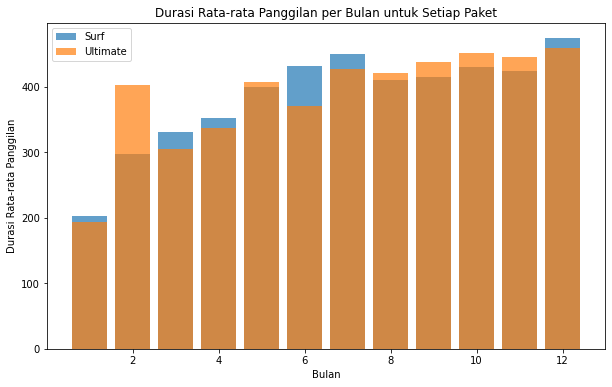

In [90]:
#Buatlah sebuah diagram batang untuk memvisualisasikannya.
plt.figure(figsize=(10, 6))
plt.bar(avg_calls_duration['month'], avg_calls_duration['surf'], label='Surf', alpha=0.7)
plt.bar(avg_calls_duration['month'], avg_calls_duration['ultimate'], label='Ultimate', alpha=0.7)
plt.xlabel('Bulan')
plt.ylabel('Durasi Rata-rata Panggilan')
plt.title('Durasi Rata-rata Panggilan per Bulan untuk Setiap Paket')
plt.legend()
plt.show()

In [91]:
data_users_plans_full

,user_id,month,count_calls,total_duration,rounded_gb_used,message_count,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,call_charge,message_charge,internet_charge,billing
0,1000,12,16.0,124.0,2.0,11.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0,0.0,0.00,0.0,70.00
1,1001,10,65.0,393.0,22.0,53.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.09,70.0,90.09
2,1001,11,64.0,426.0,19.0,36.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,40.0,60.00
3,1001,12,56.0,412.0,19.0,44.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,40.0,60.00
4,1001,8,27.0,182.0,7.0,30.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,0.0,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,11,0.0,0.0,21.0,42.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0,0.0,0.00,0.0,70.00
2289,1204,12,0.0,0.0,36.0,78.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0,0.0,0.00,42.0,112.00
2290,1349,10,0.0,0.0,13.0,76.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.78,0.0,20.78
2291,1349,11,0.0,0.0,17.0,72.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.66,20.0,40.66


In [92]:
# Bandingkan jumlah menit yang dibutuhkan pengguna tiap paket per bulannya.
total_minutes_per_month = data_users_plans_full[['month', 'plan', 'total_duration']]
total_minutes_per_month

,month,plan,total_duration
0,12,ultimate,124.0
1,10,surf,393.0
2,11,surf,426.0
3,12,surf,412.0
4,8,surf,182.0
...,...,...,...
2288,11,ultimate,0.0
2289,12,ultimate,0.0
2290,10,surf,0.0
2291,11,surf,0.0


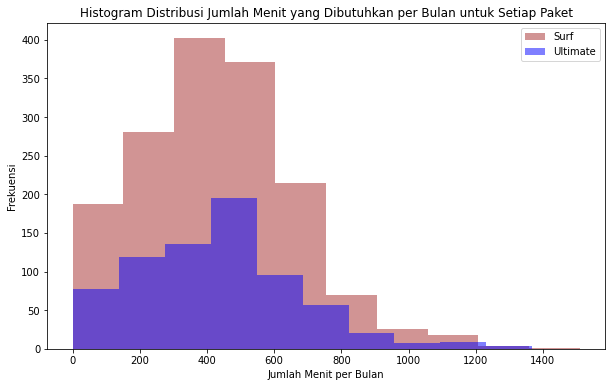

In [93]:
# Buatlah sebuah histogram.
plt.figure(figsize=(10, 6))
plt.hist(total_minutes_per_month[total_minutes_per_month['plan'] == 'surf']['total_duration'], bins=10, alpha=0.5, label='Surf', color='brown')
plt.hist(total_minutes_per_month[total_minutes_per_month['plan'] == 'ultimate']['total_duration'], bins=10, alpha=0.5, label='Ultimate', color='blue')
plt.xlabel('Jumlah Menit per Bulan')
plt.ylabel('Frekuensi')
plt.title('Histogram Distribusi Jumlah Menit yang Dibutuhkan per Bulan untuk Setiap Paket')
plt.legend()
plt.show()

[Hitung rata-rata dan variabel durasi panggilan untuk mempertimbangkan apakah pengguna pada paket yang berbeda memiliki perilaku penggunaan panggilan yang berbeda pula.]

In [94]:
# Hitung rata-rata dan varians dari durasi panggilan bulanan
average_duration = data_users_plans_full['total_duration'].mean()
variance_duration = data_users_plans_full['total_duration'].var()


In [95]:
# Menampilkan hasil
print("Rata-rata Durasi Panggilan Bulanan:")
print(average_duration)

print("\nVarians Durasi Panggilan Bulanan:")
print(variance_duration)

Rata-rata Durasi Panggilan Bulanan:
429.2834714348016

Varians Durasi Panggilan Bulanan:
55847.17877118995


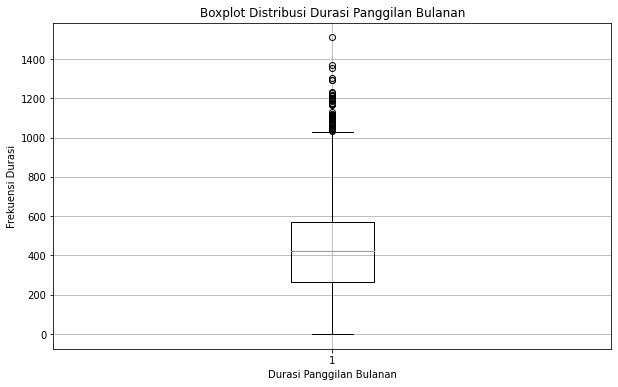

In [96]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi durasi panggilan bulanan
plt.figure(figsize=(10, 6))
plt.boxplot(data_users_plans_full['total_duration'])
plt.xlabel('Durasi Panggilan Bulanan')
plt.ylabel('Frekuensi Durasi')
plt.title('Boxplot Distribusi Durasi Panggilan Bulanan')
plt.grid(True)
plt.show()

[Rumuskan kesimpulan tentang perilaku pengguna dalam melakukan panggilan. Apakah perilaku mereka berbeda antara setiap paketnya?]

**Kesimpulan :**
 - Durasi rata-rata panggilan telpon antara paket surf dan ultimate yang ditunjukkan dengan diagram batang, tampak tidak terlalu terdapat perbedaan yang signifikan.
 - Pada 'Histogram Distribusi Jumlah Menit yang Dibutuhkan per Bulan untuk Setiap Paket', dapat dilihat bahwa paket surf memiliki kebutuhan yang jauh lebih banyak dibandingkan dengan paket ultimate. 
 - Pada 'Boxplot Distribusi Durasi Panggilan Bulanan', dapat dilihat bahwa nilai tengah / mean data berada pada angka sekitar 420 menit. 

#### Pesan/SMS

In [97]:
# Bandingkan jumlah SMS yang cenderung dikirim pengguna tiap paket per bulannya
sms_per_month = data_users_plans_full[['month', 'plan', 'message_count']]
sms_per_month

,month,plan,message_count
0,12,ultimate,11.0
1,10,surf,53.0
2,11,surf,36.0
3,12,surf,44.0
4,8,surf,30.0
...,...,...,...
2288,11,ultimate,42.0
2289,12,ultimate,78.0
2290,10,surf,76.0
2291,11,surf,72.0


In [98]:
# Bandingkan jumlah SMS yang dihabiskan oleh pengguna per paket
total_sms_per_plan = sms_per_month.groupby('plan')['message_count'].sum().reset_index()
total_sms_per_plan

,plan,message_count
0,surf,49014.0
1,ultimate,27037.0


In [99]:
# Bandingkan jumlah SMS yang dibutuhkan pengguna tiap paket per bulannya.
total_sms_per_plan = sms_per_month.groupby('plan')['message_count'].sum().reset_index()
total_sms_per_plan

,plan,message_count
0,surf,49014.0
1,ultimate,27037.0


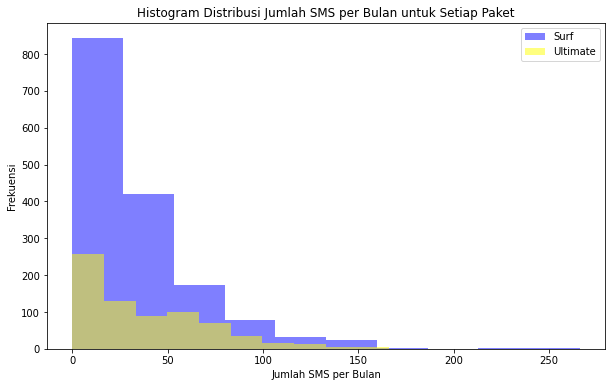

In [100]:
# Buatlah sebuah histogramnya
plt.figure(figsize=(10, 6))
plt.hist(sms_per_month[sms_per_month['plan'] == 'surf']['message_count'], bins=10, alpha=0.5, label='Surf', color='blue')
plt.hist(sms_per_month[sms_per_month['plan'] == 'ultimate']['message_count'], bins=10, alpha=0.5, label='Ultimate', color='yellow')
plt.xlabel('Jumlah SMS per Bulan')
plt.ylabel('Frekuensi')
plt.title('Histogram Distribusi Jumlah SMS per Bulan untuk Setiap Paket')
plt.legend()
plt.show()


In [101]:
# Hitung rata-rata dan varians dari SMS bulanan
average_sms = sms_per_month.groupby('plan')['message_count'].mean()
variance_sms = sms_per_month.groupby('plan')['message_count'].var()

In [102]:
# Menampilkan hasil
print("Rata-rata SMS Bulanan:")
print(average_sms)

print("\nVarians SMS Bulanan:")
print(variance_sms)

Rata-rata SMS Bulanan:
plan
surf        31.159568
ultimate    37.551389
Name: message_count, dtype: float64

Varians SMS Bulanan:
plan
surf        1126.724522
ultimate    1208.756744
Name: message_count, dtype: float64


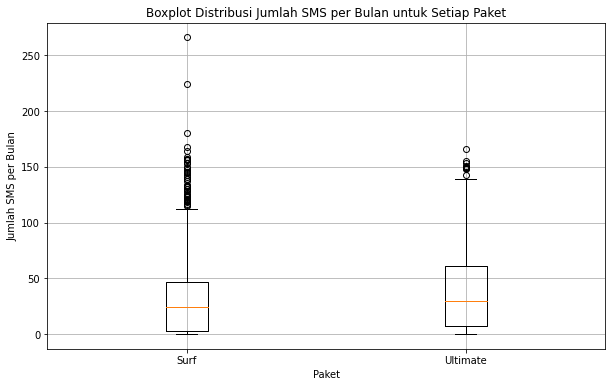

In [103]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi SMS bulanan
plt.figure(figsize=(10, 6))
plt.boxplot([sms_per_month[sms_per_month['plan'] == 'surf']['message_count'], sms_per_month[sms_per_month['plan'] == 'ultimate']['message_count']], labels=['Surf', 'Ultimate'])
plt.xlabel('Paket')
plt.ylabel('Jumlah SMS per Bulan')
plt.title('Boxplot Distribusi Jumlah SMS per Bulan untuk Setiap Paket')
plt.grid(True)
plt.show()

**Kesimpulan :**
 - Pada 'Histogram Distribusi Jumlah SMS per Bulan untuk Setiap Paket', dapat dilihat bahwa paket surf memiliki kebutuhan yang jauh lebih banyak dibandingkan dengan paket ultimate. 
 - Pada 'Boxplot Distribusi Jumlah SMS per Bulan untuk Setiap Paket', dapat dilihat bahwa nilai tengah / mean data paket surf berada pada angka sekitar 30 sms sedangkan nilai tengah / mean data paket ultimate lebih tinggi, yaitu sekitar 37 sms. 

#### Internet

In [104]:
# Bandingkan jumlah  Internet yang cenderung digunakan pengguna tiap paket per bulannya
internet_per_month = data_users_plans_full[['month', 'plan', 'rounded_gb_used']]
internet_per_month

,month,plan,rounded_gb_used
0,12,ultimate,2.0
1,10,surf,22.0
2,11,surf,19.0
3,12,surf,19.0
4,8,surf,7.0
...,...,...,...
2288,11,ultimate,21.0
2289,12,ultimate,36.0
2290,10,surf,13.0
2291,11,surf,17.0


In [105]:
# Bandingkan jumlah  Internet yang dihabiskan oleh pengguna per paket
total_internet_per_plan = internet_per_month.groupby('plan')['rounded_gb_used'].sum().reset_index()
total_internet_per_plan

,plan,rounded_gb_used
0,surf,26223.0
1,ultimate,12461.0


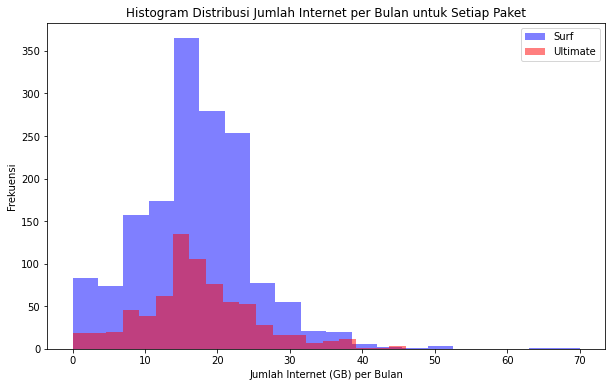

In [106]:
# Bandingkan jumlah  Internet yang dibutuhkan pengguna tiap paket per bulanny dan buatlah sebuah histogramnya
plt.figure(figsize=(10, 6))
plt.hist(internet_per_month[internet_per_month['plan'] == 'surf']['rounded_gb_used'], bins=20, alpha=0.5, label='Surf', color='blue')
plt.hist(internet_per_month[internet_per_month['plan'] == 'ultimate']['rounded_gb_used'], bins=20, alpha=0.5, label='Ultimate', color='red')
plt.xlabel('Jumlah Internet (GB) per Bulan')
plt.ylabel('Frekuensi')
plt.title('Histogram Distribusi Jumlah Internet per Bulan untuk Setiap Paket')
plt.legend()
plt.show()


In [107]:
# Hitung rata-rata dan varians dari durasi  Internet bulanan
average_internet = internet_per_month.groupby('plan')['rounded_gb_used'].mean()
variance_internet = internet_per_month.groupby('plan')['rounded_gb_used'].var()

In [108]:
# Menampilkan hasil
print("Rata-rata Internet Bulanan:")
print(average_internet)

print("\nVarians Internet Bulanan:")
print(variance_internet)

Rata-rata Internet Bulanan:
plan
surf        16.670693
ultimate    17.306944
Name: rounded_gb_used, dtype: float64

Varians Internet Bulanan:
plan
surf        61.58360
ultimate    58.83055
Name: rounded_gb_used, dtype: float64


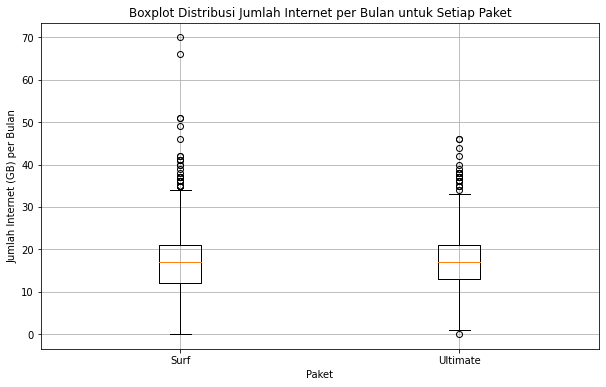

In [109]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi durasi  Internet bulanan
plt.figure(figsize=(10, 6))
plt.boxplot([internet_per_month[internet_per_month['plan'] == 'surf']['rounded_gb_used'], internet_per_month[internet_per_month['plan'] == 'ultimate']['rounded_gb_used']], labels=['Surf', 'Ultimate'])
plt.xlabel('Paket')
plt.ylabel('Jumlah Internet (GB) per Bulan')
plt.title('Boxplot Distribusi Jumlah Internet per Bulan untuk Setiap Paket')
plt.grid(True)
plt.show()

[Rumuskan kesimpulan tentang bagaimana pengguna cenderung mengonsumsi paket data internet? Apakah perilaku mereka berbeda antara setiap paketnya?]

**Kesimpulan :**
- Pada Histogram Distribusi Jumlah Internet per Bulan untuk Setiap Paket, dapat dilihat bahwa paket surf memiliki kebutuhan internet yang jauh lebih banyak dibandingkan dengan paket ultimate.
- Pada 'Boxplot Distribusi Jumlah Internet per Bulan untuk Setiap Paket', dapat dilihat bahwa nilai tengah / mean data paket surf dan ultimate hampir sama di kisaran 16 gb. 

####  Pendapatan

[Seperti halnya Anda telah mempelajari perilaku pengguna, deskripsikan secara statistik pendapatan yang diperoleh antara tiap-tiap paket prabayar].

In [110]:
data_users_plans_full.head()

,user_id,month,count_calls,total_duration,rounded_gb_used,message_count,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,call_charge,message_charge,internet_charge,billing
0,1000,12,16.0,124.0,2.0,11.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0,0.0,0.00,0.0,70.00
1,1001,10,65.0,393.0,22.0,53.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.09,70.0,90.09
2,1001,11,64.0,426.0,19.0,36.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,40.0,60.00
3,1001,12,56.0,412.0,19.0,44.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,40.0,60.00
4,1001,8,27.0,182.0,7.0,30.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,0.0,20.00


In [111]:
# Persiapkan dataset
income_monthly = pd.pivot_table(data_users_plans_full, index='month', columns='plan', values='billing', aggfunc='sum').reset_index()
income_monthly['month'] = income_monthly['month'].astype(int)
income_monthly = income_monthly.sort_values(by='month')
income_monthly

plan,month,surf,ultimate
0,1,40.00,280.0
4,2,309.57,490.0
5,3,1056.65,896.0
6,4,2035.53,1533.0
7,5,3667.37,2051.0
8,6,4779.80,3367.0
9,7,7583.56,4242.0
10,8,10356.85,5173.0
11,9,11304.67,6195.0
1,10,15504.83,7665.0


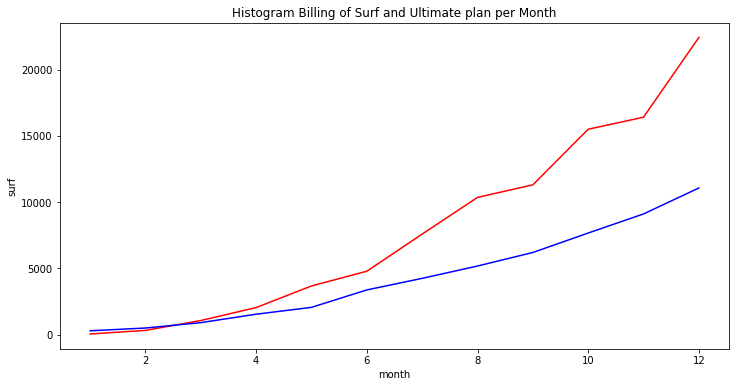

In [112]:
plt.figure(figsize=(12, 6))
plt.title('Histogram Billing of Surf and Ultimate plan per Month')
sns.lineplot(data=income_monthly, x="month", y="surf", color='red')
sns.lineplot(data=income_monthly, x="month", y="ultimate", color='blue')
plt.show()

[Rumuskan kesimpulan tentang bagaimana perbedaan pendapatan yang dihasilkan setiap paket.]

**Kesimpulan :**

- Pada 'Histogram Billing of Surf and Ultimate plan per Month', dapat dilihat bahwa secara keseluruhan paket surf memiliki billing yang lebih tinggi dibandingkan dengan paket ultimate. Dimana billing klien mengindikasikan income/ pendapatan. 


## Menguji Hipotesis Statistik

### Hipotesis pendapatan rata-rata dari pengguna paket prabayar Ultimate dan Surf

[Rumuskan hipotesis nol dan alternatif, pilih pengujian statistiknya, dan tentukan nilai "alpha".]
- H0 (Null Hypothesis) = Rata-rata pendapatan dari pengguna paket Ultimate dan Surf adalah 'sama'. 
- H1 (Alternative Hypothesis) = Rata-rata pendapatan dari pengguna paket Ultimate dan Surf adalah 'tidak sama'.

In [113]:
# Buat variable surf_billing dan ultimate_billing
surf_billing = data_users_plans_full.loc[data_users_plans_full['plan']=='surf']['billing']
ultimate_billing = data_users_plans_full.loc[data_users_plans_full['plan']=='ultimate']['billing']                                        

In [114]:
# Cari shape dari surf_billing dan ultimate_billing
surf_billing.shape, ultimate_billing.shape

((1573,), (720,))

In [115]:
# Tampilkan nilai surf_billing
surf_billing

1        90.09
2        60.00
3        60.00
4        20.00
5        20.00
         ...  
2286     20.00
2287    240.78
2290     20.78
2291     40.66
2292     20.33
Name: billing, Length: 1573, dtype: float64

In [116]:
# Tampilkan nilai ultimate_billing
ultimate_billing

0        70.0
19       70.0
20       84.0
26       70.0
27       70.0
        ...  
2231     70.0
2247     70.0
2269     70.0
2288     70.0
2289    112.0
Name: billing, Length: 720, dtype: float64

In [117]:
# Uji hipotesisnya
pv1 = st.levene(surf_billing, ultimate_billing).pvalue

In [118]:
alpha = 0.5
if pv1 < alpha:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

Reject the null hypothesis


In [119]:
results = st.ttest_ind(surf_billing, ultimate_billing, equal_var=False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

p-value:  3.17039054811355e-15
Reject the null hypothesis


**Kesimpulan :**
Hasil pengujian hipotesis diatas menunjukkan bahwa p-value lbih kecil dari nilai alpha, maka kita menolak hipotesis nol (H0). Artinya, kita dapat menyatakan bahwa rata-rata pendapatan dari pengguna paket Ultimate dan Surf berbeda secara signifikan.

### Hipotesis bahwa pendapatan rata-rata dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain

[Rumuskan hipotesis nol dan alternatif, pilih pengujian statistiknya, dan tentukan nilai "alpha".]

In [120]:
# Buat variable nynj_billing dan non_nynj_billing
nynj_billing = data_users_plans_full.loc[data_users_plans_full['city'].str.contains('NY-NJ')]['billing']
non_nynj_billing = data_users_plans_full.loc[~data_users_plans_full['city'].str.contains('NY-NJ')]['billing']

In [121]:
# Cari shape dari nynj_billing dan non_nynj_billing
nynj_billing.shape, non_nynj_billing.shape

((377,), (1916,))

In [122]:
# Tampilkan nilai nynj_billing
nynj_billing

56       20.00
57       38.84
75       62.22
76       90.00
77       52.55
         ...  
2263    170.27
2264    200.00
2265    110.33
2266     80.00
2267    120.42
Name: billing, Length: 377, dtype: float64

In [123]:
# Tampilkan nilai non_nynj_billing
non_nynj_billing

0        70.00
1        90.09
2        60.00
3        60.00
4        20.00
         ...  
2288     70.00
2289    112.00
2290     20.78
2291     40.66
2292     20.33
Name: billing, Length: 1916, dtype: float64

In [124]:
# Uji hipotesisnya
pv2 = st.levene(nynj_billing, non_nynj_billing).pvalue

In [125]:
alpha = 0.5
if pv2 < alpha:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

Reject the null hypothesis


In [126]:
results = st.ttest_ind(nynj_billing, non_nynj_billing, equal_var=False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

p-value:  0.03352561588530014
Reject the null hypothesis


**Kesimpulan :**
Hasil pengujian hipotesis diatas menunjukkan bahwa p-value lbih kecil dari nilai alpha, maka kita menolak hipotesis nol (H0). Artinya, kita dapat menyatakan bahwa rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda secara signifikan dengan pendapatan pengguna dari wilayah lain.

## Kesimpulan Umum

**Kesimpulan pada tahap Inisiasi:**

- data_users : terdapat 466 data null pada kolom churn_date (hal ini menunjukkan bahwa sebagian besar pengguna masih menggunakan layanan pada saat data ini dibuat), tipe data reg_date dan churn_date belum sesuai, tidak terdapat duplikasi data.
- data_calls : tidak ada data yang hilang, tipe data call_date belum sesuai, tidak terdapat duplikasi data.
- data_internet : tidak ada data yang hilang, tipe data session_date belum sesuai, tidak terdapat duplikasi data.
- data_messages : tidak ada data yang hilang, tipe data message_date belum sesuai, tidak terdapat duplikasi data.
- data_plans : tidak ada data yang hilang dan tipe data sudah sesuai, tidak terdapat duplikasi data.


**Kesimpulan yang dapat diambil dari informasi umum dan sampel data yang terkait harga adalah sbb :**

- Tidak terdapat data yang hilang
- Terdapat beberapa tipe data yang kurang sesuai (sudah disesuaikan)
- Billing klien untuk langganan paket prabayar surf dan ultimate sudah di hitung total bayar termasuk kelebihannya. Misalnya klien dengan user_id (1001) berlangganan paket prabayar 'surf' dan memiliki kelebihan pemakaian pada pesan dan internet sehingga total billing klien menjadi $ 90.09


**Kesimpulan Statika:**

_Panggilan_
- Durasi rata-rata panggilan telpon antara paket surf dan ultimate yang ditunjukkan dengan diagram batang, tampak tidak terlalu terdapat perbedaan yang signifikan.
- Pada 'Histogram Distribusi Jumlah Menit yang Dibutuhkan per Bulan untuk Setiap Paket', dapat dilihat bahwa paket surf memiliki kebutuhan yang jauh lebih banyak dibandingkan dengan paket ultimate. 
- Pada 'Boxplot Distribusi Durasi Panggilan Bulanan', dapat dilihat bahwa nilai tengah / mean data berada pada angka sekitar 420 menit. 

_Pesan/SMS_
- Pada 'Histogram Distribusi Jumlah SMS per Bulan untuk Setiap Paket', dapat dilihat bahwa paket surf memiliki kebutuhan yang jauh lebih banyak dibandingkan dengan paket ultimate.
- Pada 'Boxplot Distribusi Jumlah SMS per Bulan untuk Setiap Paket', dapat dilihat bahwa nilai tengah / mean data paket surf berada pada angka sekitar 30 sms sedangkan nilai tengah / mean data paket ultimate lebih tinggi, yaitu sekitar 37 sms.

_Internet_
- Pada Histogram Distribusi Jumlah Internet per Bulan untuk Setiap Paket, dapat dilihat bahwa paket surf memiliki kebutuhan internet yang jauh lebih banyak dibandingkan dengan paket ultimate.
- Pada 'Boxplot Distribusi Jumlah Internet per Bulan untuk Setiap Paket', dapat dilihat bahwa nilai tengah / mean data paket surf dan ultimate hampir sama di kisaran 16 gb.

_Pendapatan_
- Pada 'Histogram Billing of Surf and Ultimate plan per Month', dapat dilihat bahwa secara keseluruhan paket surf memiliki billing yang lebih tinggi dibandingkan dengan paket ultimate. Dimana billing klien mengindikasikan income/ pendapatan.

**Kesimpulan Uji Hipotesis:**

- Hasil pengujian hipotesis diatas menunjukkan bahwa p-value lbih kecil dari nilai alpha, maka kita menolak hipotesis nol (H0). Artinya, kita dapat menyatakan bahwa rata-rata pendapatan dari pengguna paket Ultimate dan Surf berbeda secara signifikan.
- Hasil pengujian hipotesis diatas menunjukkan bahwa p-value lbih kecil dari nilai alpha, maka kita menolak hipotesis nol (H0). Artinya, kita dapat menyatakan bahwa rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda secara signifikan dengan pendapatan pengguna dari wilayah lain.